### Izzet Emre Kucukkaya
# CMPE597 HW1

### Read dataset

In [1]:
from tensorflow.keras import datasets
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import numpy as np
import os
import torchvision.datasets as dset
import torchvision.transforms as transforms
from torch.autograd import Variable
import matplotlib.pyplot as plt

In [5]:
# MNIST dataset
"""
dataset = datasets.mnist.load_data(path="mnist.npz")
X_train = dataset[0][0]
Y_train = dataset[0][1]
X_test = dataset[1][0]
Y_test = dataset[1][1]

X_train = X_train.astype("float32") / 255
X_test = X_test.astype("float32") / 255

X_train = np.expand_dims(X_train, -1)
X_test = np.expand_dims(X_test, -1)
"""

root = './data'
if not os.path.exists(root):
    os.mkdir(root)
    
trans = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (1.0,))])
# if not exist, download mnist dataset
train_set = dset.MNIST(root=root, train=True, transform=trans, download=True)
test_set = dset.MNIST(root=root, train=False, transform=trans, download=True)
x, y = train_set[0]
batch_size = 100

train_loader = torch.utils.data.DataLoader(
                 dataset=train_set,
                 batch_size=batch_size,
                 shuffle=True)
test_loader = torch.utils.data.DataLoader(
                dataset=test_set,
                batch_size=batch_size,
                shuffle=False)
print(train_set.data.shape)

torch.Size([60000, 28, 28])


### Using Own Implementation

In [3]:
from CNN_Class import Network_Model, Conv2D_Layer, MaxPooling2D_Layer, FC_Layer, default_optimizer, cross_entropy

In [10]:
model = Network_Model(cross_entropy, default_optimizer)
model.add(Conv2D_Layer(channels=4, stride=1, kernel_size=5, activation="relu"))
model.add(MaxPooling2D_Layer(size=2))
model.add(Conv2D_Layer(channels=8, stride=1, kernel_size=5, activation="relu"))
model.add(MaxPooling2D_Layer(size=2))
model.add(FC_Layer(innode=3200, outnode=128, activation="relu"))
model.add(FC_Layer(innode=128, outnode=10, activation=None))
model.train(train_set, test_set, epochs=5, lr=0.001, verbose=True)


 ==> Epoch 0
[-2.93102176e+04 -3.11844993e+06 -5.08217077e+03  3.70031692e+03
 -4.07936730e+03 -9.77189853e+03 -6.25304211e+01  5.03151233e+03
 -5.32782235e+06  2.81724099e+02 -5.80614494e+05 -3.56188193e+02
 -3.77536819e+06 -9.25724719e+05 -6.99046060e+05 -1.55154241e+03
  9.16053692e+03 -4.33844915e+06  3.40399385e+03 -2.52967363e+06
 -3.03139642e+06 -6.58276240e+05 -4.25680720e+06 -1.54010609e+04
 -4.30554147e+05 -1.87388370e+05  1.17703255e+04 -5.15897604e+03
 -4.31560209e+03  9.56133067e+03 -7.05502955e+05 -1.00850106e+06
 -3.23817387e+03 -7.74323140e+06 -1.01789638e+03 -9.59784541e+03
  1.61333409e+04 -1.54184069e+06  6.06890821e+03 -4.37843359e+03
 -3.97692226e+02 -1.02499993e+04 -3.87430141e+05 -5.87148001e+03
 -1.14279561e+06 -2.69515982e+06 -7.37381584e+05  5.75967396e+03
 -3.65988786e+05 -2.20984950e+05 -1.18748482e+06  3.83824551e+03
 -4.70425563e+03  2.97458747e+03  2.96119596e+03  1.15829378e+03
 -1.15378072e+04 -5.26185250e+03  9.02326945e+03 -5.62189096e+06
 -2.7600564

[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan]
[[[nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]
  ...
  [nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]]

 [[nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]
  ...
  [nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]]

 [[nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]
  [nan nan nan 

[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan]
[[[nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]
  ...
  [nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]]

 [[nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]
  ...
  [nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]]

 [[nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]
  [nan nan nan 

[[[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
   nan nan nan nan nan nan nan nan nan nan nan]
  [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
   nan nan nan nan nan nan nan nan nan nan nan]
  [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
   nan nan nan nan nan nan nan nan nan nan nan]
  [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
   nan nan nan nan nan nan nan nan nan nan nan]
  [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
   nan nan nan nan nan nan nan nan nan nan nan]
  [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
   nan nan nan nan nan nan nan nan nan nan nan]
  [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
   nan nan nan nan nan nan nan nan nan nan nan]
  [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
   nan nan nan nan nan nan nan nan nan nan nan]
  [nan nan nan nan nan nan nan nan nan nan nan n

[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan]
[[[nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]
  ...
  [nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]]

 [[nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]
  ...
  [nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]]

 [[nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]
  [nan nan nan 

[[[nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]
  ...
  [nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]]

 [[nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]
  ...
  [nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]]

 [[nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]
  ...
  [nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]]

 [[nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]
  ...
  [nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]]]
[[[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
   nan nan nan nan nan nan nan nan nan nan nan]
  [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
   nan nan

[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan]
[[[nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]
  ...
  [nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]]

 [[nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]
  ...
  [nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]]

 [[nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]
  [nan nan nan 

[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan]
[[[nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]
  ...
  [nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]]

 [[nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]
  ...
  [nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]]

 [[nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]
  [nan nan nan 

[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan]
[[[nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]
  ...
  [nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]]

 [[nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]
  ...
  [nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]]

 [[nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]
  [nan nan nan 

[[[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
   nan nan nan nan nan nan nan nan nan nan nan]
  [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
   nan nan nan nan nan nan nan nan nan nan nan]
  [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
   nan nan nan nan nan nan nan nan nan nan nan]
  [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
   nan nan nan nan nan nan nan nan nan nan nan]
  [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
   nan nan nan nan nan nan nan nan nan nan nan]
  [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
   nan nan nan nan nan nan nan nan nan nan nan]
  [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
   nan nan nan nan nan nan nan nan nan nan nan]
  [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
   nan nan nan nan nan nan nan nan nan nan nan]
  [nan nan nan nan nan nan nan nan nan nan nan n

[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan]
[[[nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]
  ...
  [nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]]

 [[nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]
  ...
  [nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]]

 [[nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]
  [nan nan nan 

[[[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
   nan nan nan nan nan nan nan nan nan nan nan]
  [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
   nan nan nan nan nan nan nan nan nan nan nan]
  [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
   nan nan nan nan nan nan nan nan nan nan nan]
  [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
   nan nan nan nan nan nan nan nan nan nan nan]
  [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
   nan nan nan nan nan nan nan nan nan nan nan]
  [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
   nan nan nan nan nan nan nan nan nan nan nan]
  [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
   nan nan nan nan nan nan nan nan nan nan nan]
  [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
   nan nan nan nan nan nan nan nan nan nan nan]
  [nan nan nan nan nan nan nan nan nan nan nan n

[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan]
[[[nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]
  ...
  [nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]]

 [[nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]
  ...
  [nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]]

 [[nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]
  [nan nan nan 

[[[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
   nan nan nan nan nan nan nan nan nan nan nan]
  [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
   nan nan nan nan nan nan nan nan nan nan nan]
  [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
   nan nan nan nan nan nan nan nan nan nan nan]
  [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
   nan nan nan nan nan nan nan nan nan nan nan]
  [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
   nan nan nan nan nan nan nan nan nan nan nan]
  [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
   nan nan nan nan nan nan nan nan nan nan nan]
  [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
   nan nan nan nan nan nan nan nan nan nan nan]
  [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
   nan nan nan nan nan nan nan nan nan nan nan]
  [nan nan nan nan nan nan nan nan nan nan nan n

[[[nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]
  ...
  [nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]]

 [[nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]
  ...
  [nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]]

 [[nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]
  ...
  [nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]]

 ...

 [[nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]
  ...
  [nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]]

 [[nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]
  ...
  [nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan n

[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan]
[[[nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]
  ...
  [nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]]

 [[nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]
  ...
  [nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]]

 [[nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]
  [nan nan nan 

[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan]
[[[nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]
  ...
  [nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]]

 [[nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]
  ...
  [nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]]

 [[nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]
  [nan nan nan 

[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan]
[[[nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]
  ...
  [nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]]

 [[nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]
  ...
  [nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]]

 [[nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]
  [nan nan nan 

[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan]
[[[nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]
  ...
  [nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]]

 [[nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]
  ...
  [nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]]

 [[nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]
  [nan nan nan 

[[[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
   nan nan nan nan nan nan nan nan nan nan nan]
  [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
   nan nan nan nan nan nan nan nan nan nan nan]
  [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
   nan nan nan nan nan nan nan nan nan nan nan]
  [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
   nan nan nan nan nan nan nan nan nan nan nan]
  [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
   nan nan nan nan nan nan nan nan nan nan nan]
  [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
   nan nan nan nan nan nan nan nan nan nan nan]
  [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
   nan nan nan nan nan nan nan nan nan nan nan]
  [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
   nan nan nan nan nan nan nan nan nan nan nan]
  [nan nan nan nan nan nan nan nan nan nan nan n

[[[nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]
  ...
  [nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]]

 [[nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]
  ...
  [nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]]

 [[nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]
  ...
  [nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]]

 [[nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]
  ...
  [nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]]]
[[[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
   nan nan nan nan nan nan nan nan nan nan nan]
  [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
   nan nan

[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan]
[[[nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]
  ...
  [nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]]

 [[nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]
  ...
  [nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]]

 [[nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]
  [nan nan nan 

[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan]
[[[nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]
  ...
  [nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]]

 [[nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]
  ...
  [nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]]

 [[nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]
  [nan nan nan 

[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan]
[[[nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]
  ...
  [nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]]

 [[nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]
  ...
  [nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]]

 [[nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]
  [nan nan nan 

[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan]
[[[nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]
  ...
  [nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]]

 [[nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]
  ...
  [nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]]

 [[nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]
  [nan nan nan 

[[[nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]
  ...
  [nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]]

 [[nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]
  ...
  [nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]]

 [[nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]
  ...
  [nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]]

 [[nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]
  ...
  [nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]]]
[[[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
   nan nan nan nan nan nan nan nan nan nan nan]
  [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
   nan nan

[[[nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]
  ...
  [nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]]

 [[nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]
  ...
  [nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]]

 [[nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]
  ...
  [nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]]

 [[nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]
  ...
  [nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]]]
[[[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
   nan nan nan nan nan nan nan nan nan nan nan]
  [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
   nan nan

[[[nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]
  ...
  [nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]]

 [[nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]
  ...
  [nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]]

 [[nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]
  ...
  [nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]]

 [[nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]
  ...
  [nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]]]
[[[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
   nan nan nan nan nan nan nan nan nan nan nan]
  [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
   nan nan

[[[nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]
  ...
  [nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]]

 [[nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]
  ...
  [nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]]

 [[nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]
  ...
  [nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]]

 ...

 [[nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]
  ...
  [nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]]

 [[nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]
  ...
  [nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan n

[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan]
[[[nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]
  ...
  [nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]]

 [[nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]
  ...
  [nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]]

 [[nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]
  [nan nan nan 

[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan]
[[[nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]
  ...
  [nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]]

 [[nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]
  ...
  [nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]]

 [[nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]
  [nan nan nan 

[[[nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]
  ...
  [nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]]

 [[nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]
  ...
  [nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]]

 [[nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]
  ...
  [nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]]

 ...

 [[nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]
  ...
  [nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]]

 [[nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]
  ...
  [nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan n

[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan]
[[[nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]
  ...
  [nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]]

 [[nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]
  ...
  [nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]]

 [[nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]
  [nan nan nan 

[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan]
[[[nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]
  ...
  [nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]]

 [[nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]
  ...
  [nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]]

 [[nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]
  [nan nan nan 

[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan]
[[[nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]
  ...
  [nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]]

 [[nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]
  ...
  [nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]]

 [[nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]
  [nan nan nan 

[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan]
[[[nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]
  ...
  [nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]]

 [[nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]
  ...
  [nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]]

 [[nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]
  [nan nan nan 

[[[nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]
  ...
  [nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]]

 [[nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]
  ...
  [nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]]

 [[nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]
  ...
  [nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]]

 ...

 [[nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]
  ...
  [nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]]

 [[nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]
  ...
  [nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan n

[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan]
[[[nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]
  ...
  [nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]]

 [[nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]
  ...
  [nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]]

 [[nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]
  [nan nan nan 

[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan]
[[[nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]
  ...
  [nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]]

 [[nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]
  ...
  [nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]]

 [[nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]
  [nan nan nan 

[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan]
[[[nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]
  ...
  [nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]]

 [[nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]
  ...
  [nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]]

 [[nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]
  [nan nan nan 

[[[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
   nan nan nan nan nan nan nan nan nan nan nan]
  [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
   nan nan nan nan nan nan nan nan nan nan nan]
  [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
   nan nan nan nan nan nan nan nan nan nan nan]
  [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
   nan nan nan nan nan nan nan nan nan nan nan]
  [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
   nan nan nan nan nan nan nan nan nan nan nan]
  [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
   nan nan nan nan nan nan nan nan nan nan nan]
  [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
   nan nan nan nan nan nan nan nan nan nan nan]
  [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
   nan nan nan nan nan nan nan nan nan nan nan]
  [nan nan nan nan nan nan nan nan nan nan nan n

[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan]
[[[nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]
  ...
  [nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]]

 [[nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]
  ...
  [nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]]

 [[nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]
  [nan nan nan 

KeyboardInterrupt: 

In [ ]:
Y = [(np.asarray(x), y) for x, y in test_set]
x,y = model.eval(Y[0:5])
print(x,y)

### Using pytorch

In [298]:
class PytorchNetwork(nn.Module):
    def __init__(self):
      super(PytorchNetwork, self).__init__()

      self.conv1 = nn.Conv2d(in_channels=1, out_channels=4, kernel_size=5, stride=1)
      self.pool1 = nn.MaxPool2d(2, 2)
    
      self.conv2 = nn.Conv2d(in_channels=4, out_channels=8, kernel_size=5, stride=1)
      self.pool2 = nn.MaxPool2d(2, 2)
    
      self.fc1 = nn.Linear(128, 128)
      self.fc2 = nn.Linear(128, 10)
    
    def forward(self, x):
      x = self.conv1(x)
      x = F.relu(x)
      x = self.pool1(x)
    
      x = self.conv2(x)
      x = F.relu(x)
      x = self.pool2(x)
      
      x = torch.flatten(x, 1)

      x = self.fc1(x)
      x = F.relu(x)
      x = self.fc2(x)

      output = F.log_softmax(x, dim=1)
      return output

model = PytorchNetwork()
print(model)

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

PytorchNetwork(
  (conv1): Conv2d(1, 4, kernel_size=(5, 5), stride=(1, 1))
  (pool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(4, 8, kernel_size=(5, 5), stride=(1, 1))
  (pool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=128, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=10, bias=True)
)


In [299]:
for epoch in range(5):
    # trainning
    total_loss = 0
    for batch_idx, (x, target) in enumerate(train_loader):
        optimizer.zero_grad()
        x, target = Variable(x), Variable(target)
        out = model(x)
        loss = criterion(out, target)
        total_loss += loss.item()
        loss.backward()
        optimizer.step()
        if (batch_idx+1) % 100 == 0 or (batch_idx+1) == len(train_loader):
            print('==>>> epoch: {}, batch index: {}, train loss: {:.6f}'.format(
                epoch, batch_idx+1, total_loss))
    # testing
    correct_cnt = 0
    total_cnt = 0
    total_loss = 0
    for batch_idx, (x, target) in enumerate(test_loader):
        x, target = Variable(x), Variable(target)
        out = model(x)
        loss = criterion(out, target)
        _, pred_label = torch.max(out.data, 1)
        total_cnt += x.data.size()[0]
        correct_cnt += (pred_label == target.data).sum()
        total_loss += loss.item()
        if(batch_idx+1) % 100 == 0 or (batch_idx+1) == len(test_loader):
            print('==>>> epoch: {}, batch index: {}, test loss: {:.6f}, acc: {:.3f}'.format(
                epoch, batch_idx+1, total_loss, correct_cnt * 1.0 / total_cnt))

==>>> epoch: 0, batch index: 100, train loss: 230.522127
==>>> epoch: 0, batch index: 200, train loss: 460.497815
==>>> epoch: 0, batch index: 300, train loss: 689.874042
==>>> epoch: 0, batch index: 400, train loss: 918.725889
==>>> epoch: 0, batch index: 500, train loss: 1146.534586
==>>> epoch: 0, batch index: 600, train loss: 1372.758989
==>>> epoch: 0, batch index: 100, test loss: 224.866524, acc: 0.321
==>>> epoch: 1, batch index: 100, train loss: 222.851202
==>>> epoch: 1, batch index: 200, train loss: 436.715191
==>>> epoch: 1, batch index: 300, train loss: 620.101203
==>>> epoch: 1, batch index: 400, train loss: 733.676869
==>>> epoch: 1, batch index: 500, train loss: 802.265101
==>>> epoch: 1, batch index: 600, train loss: 854.414838
==>>> epoch: 1, batch index: 100, test loss: 43.777157, acc: 0.882
==>>> epoch: 2, batch index: 100, train loss: 43.183321
==>>> epoch: 2, batch index: 200, train loss: 83.051962
==>>> epoch: 2, batch index: 300, train loss: 118.775426
==>>> epoc

### Q2

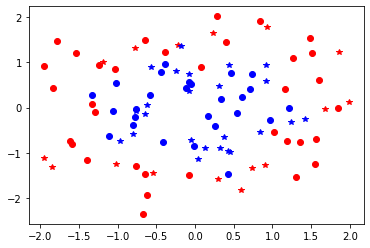

In [300]:
X_test = np.asarray(np.load("./Data/X_test.npy"), dtype=np.float32)
X_train = np.asarray(np.load("./Data/X_train.npy"), dtype=np.float32)
Y_test = np.asarray(np.load("./Data/Y_test.npy"))
Y_train = np.asarray(np.load("./Data/Y_train.npy"))
plt.plot(X_test[Y_test == 0, 0], X_test[Y_test == 0, 1], "*r")
plt.plot(X_test[Y_test == 1, 0], X_test[Y_test == 1, 1], "*b")
plt.plot(X_train[Y_train == 0, 0], X_train[Y_train == 0, 1], "or")
plt.plot(X_train[Y_train == 1, 0], X_train[Y_train == 1, 1], "ob")

In [301]:
batch_size = 10

train_loader = torch.utils.data.DataLoader(
                 dataset=[(x,y) for x, y in zip(X_train, Y_train)],
                 batch_size=batch_size,
                 shuffle=True)
test_loader = torch.utils.data.DataLoader(
                dataset=[(x,y) for x, y in zip(X_test, Y_test)],
                batch_size=len(Y_test),
                shuffle=False)
print([(x,y) for x, y in zip(X_test, Y_test)])

[(array([-1.1891905,  1.0173422], dtype=float32), 0), (array([1.8614649, 1.2298379], dtype=float32), 0), (array([0.440304 , 0.9436088], dtype=float32), 1), (array([ 0.7329011, -1.3278403], dtype=float32), 0), (array([-0.9693477 , -0.72879255], dtype=float32), 1), (array([-1.0259897, -1.2520034], dtype=float32), 0), (array([ 0.83688706, -0.54252464], dtype=float32), 1), (array([-1.949864 , -1.1116453], dtype=float32), 0), (array([ 0.42107823, -0.9507564 ], dtype=float32), 1), (array([-0.6471025 , -0.13248588], dtype=float32), 1), (array([-0.80688876, -0.5903789 ], dtype=float32), 1), (array([-0.17615908,  1.3725386 ], dtype=float32), 1), (array([-0.07870086,  0.75478023], dtype=float32), 1), (array([ 0.37287754, -0.656734  ], dtype=float32), 1), (array([1.9841359 , 0.11500192], dtype=float32), 0), (array([ 1.2425642, -0.3106096], dtype=float32), 1), (array([-0.22543794,  1.3778895 ], dtype=float32), 0), (array([-0.07644515,  0.37673712], dtype=float32), 1), (array([0.91728514, 0.9419225

In [325]:
class PytorchNetworkQ2(nn.Module):
    def __init__(self):
      super(PytorchNetworkQ2, self).__init__()
    
      self.fc1 = nn.Linear(2, 8)
      self.fc2 = nn.Linear(8, 8)
      self.fc3 = nn.Linear(8, 2)
    
    def forward(self, x):
      x = self.fc1(x)
      x = F.relu(x)
      x = self.fc2(x)
      x = F.relu(x)
      x = self.fc3(x)
        
      return torch.sigmoid(x)

model2 = PytorchNetworkQ2()
print(model2)

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model2.parameters(), lr=0.3)

PytorchNetworkQ2(
  (fc1): Linear(in_features=2, out_features=8, bias=True)
  (fc2): Linear(in_features=8, out_features=8, bias=True)
  (fc3): Linear(in_features=8, out_features=2, bias=True)
)


In [326]:
for epoch in range(1000):
    # trainning
    total_loss = 0
    model2.train()
    for batch_idx, (x, target) in enumerate(train_loader):
        optimizer.zero_grad()
        out = model2(x)
        loss = criterion(out, target)
        total_loss += loss.item()
        loss.backward()
        optimizer.step()
        if (batch_idx+1) % 100 == 0 or (batch_idx+1) == len(train_loader):
            print('==>>> epoch: {}, batch index: {}, train loss: {:.6f}'.format(
                epoch, batch_idx+1, total_loss))
    # testing
    correct_cnt, total_loss = 0, 0
    total_cnt = 0
    for batch_idx, (x, target) in enumerate(test_loader):
        x, target = Variable(x), Variable(target)
        out = model2(x)
        
        loss = criterion(out, target)
        _, pred_label = torch.max(out.data, 1)
        total_cnt += x.data.size()[0]
        correct_cnt += (pred_label == target.data).sum()
        total_loss += loss.item()
        if(batch_idx+1) % 100 == 0 or (batch_idx+1) == len(test_loader):
            print('==>>> epoch: {}, batch index: {}, test loss: {:.6f}, acc: {:.3f}'.format(
                epoch, batch_idx+1, total_loss, correct_cnt * 1.0 / total_cnt))

==>>> epoch: 0, batch index: 6, train loss: 4.208117
==>>> epoch: 0, batch index: 1, test loss: 0.690713, acc: 0.650
==>>> epoch: 1, batch index: 6, train loss: 4.183156
==>>> epoch: 1, batch index: 1, test loss: 0.692096, acc: 0.525
==>>> epoch: 2, batch index: 6, train loss: 4.158533
==>>> epoch: 2, batch index: 1, test loss: 0.693545, acc: 0.475
==>>> epoch: 3, batch index: 6, train loss: 4.137401
==>>> epoch: 3, batch index: 1, test loss: 0.694924, acc: 0.425
==>>> epoch: 4, batch index: 6, train loss: 4.115012
==>>> epoch: 4, batch index: 1, test loss: 0.696307, acc: 0.400
==>>> epoch: 5, batch index: 6, train loss: 4.098738
==>>> epoch: 5, batch index: 1, test loss: 0.697612, acc: 0.400
==>>> epoch: 6, batch index: 6, train loss: 4.081828
==>>> epoch: 6, batch index: 1, test loss: 0.698789, acc: 0.400
==>>> epoch: 7, batch index: 6, train loss: 4.069247
==>>> epoch: 7, batch index: 1, test loss: 0.699705, acc: 0.400
==>>> epoch: 8, batch index: 6, train loss: 4.052100
==>>> epoch

==>>> epoch: 90, batch index: 1, test loss: 0.470429, acc: 0.875
==>>> epoch: 91, batch index: 6, train loss: 2.463511
==>>> epoch: 91, batch index: 1, test loss: 0.464017, acc: 0.875
==>>> epoch: 92, batch index: 6, train loss: 2.490494
==>>> epoch: 92, batch index: 1, test loss: 0.463359, acc: 0.875
==>>> epoch: 93, batch index: 6, train loss: 2.503933
==>>> epoch: 93, batch index: 1, test loss: 0.459314, acc: 0.900
==>>> epoch: 94, batch index: 6, train loss: 2.462811
==>>> epoch: 94, batch index: 1, test loss: 0.466858, acc: 0.850
==>>> epoch: 95, batch index: 6, train loss: 2.500282
==>>> epoch: 95, batch index: 1, test loss: 0.474563, acc: 0.850
==>>> epoch: 96, batch index: 6, train loss: 2.489934
==>>> epoch: 96, batch index: 1, test loss: 0.465425, acc: 0.850
==>>> epoch: 97, batch index: 6, train loss: 2.509119
==>>> epoch: 97, batch index: 1, test loss: 0.468828, acc: 0.850
==>>> epoch: 98, batch index: 6, train loss: 2.454793
==>>> epoch: 98, batch index: 1, test loss: 0.47

==>>> epoch: 161, batch index: 1, test loss: 0.452365, acc: 0.900
==>>> epoch: 162, batch index: 6, train loss: 2.370288
==>>> epoch: 162, batch index: 1, test loss: 0.457684, acc: 0.875
==>>> epoch: 163, batch index: 6, train loss: 2.360450
==>>> epoch: 163, batch index: 1, test loss: 0.462209, acc: 0.875
==>>> epoch: 164, batch index: 6, train loss: 2.351854
==>>> epoch: 164, batch index: 1, test loss: 0.466084, acc: 0.850
==>>> epoch: 165, batch index: 6, train loss: 2.354943
==>>> epoch: 165, batch index: 1, test loss: 0.465097, acc: 0.875
==>>> epoch: 166, batch index: 6, train loss: 2.340397
==>>> epoch: 166, batch index: 1, test loss: 0.456544, acc: 0.875
==>>> epoch: 167, batch index: 6, train loss: 2.365439
==>>> epoch: 167, batch index: 1, test loss: 0.457471, acc: 0.875
==>>> epoch: 168, batch index: 6, train loss: 2.355801
==>>> epoch: 168, batch index: 1, test loss: 0.460426, acc: 0.875
==>>> epoch: 169, batch index: 6, train loss: 2.345636
==>>> epoch: 169, batch index: 1

==>>> epoch: 231, batch index: 1, test loss: 0.449884, acc: 0.875
==>>> epoch: 232, batch index: 6, train loss: 2.293663
==>>> epoch: 232, batch index: 1, test loss: 0.455549, acc: 0.850
==>>> epoch: 233, batch index: 6, train loss: 2.331991
==>>> epoch: 233, batch index: 1, test loss: 0.462644, acc: 0.850
==>>> epoch: 234, batch index: 6, train loss: 2.324659
==>>> epoch: 234, batch index: 1, test loss: 0.463658, acc: 0.850
==>>> epoch: 235, batch index: 6, train loss: 2.348086
==>>> epoch: 235, batch index: 1, test loss: 0.471840, acc: 0.850
==>>> epoch: 236, batch index: 6, train loss: 2.331333
==>>> epoch: 236, batch index: 1, test loss: 0.463943, acc: 0.850
==>>> epoch: 237, batch index: 6, train loss: 2.302994
==>>> epoch: 237, batch index: 1, test loss: 0.472986, acc: 0.850
==>>> epoch: 238, batch index: 6, train loss: 2.334502
==>>> epoch: 238, batch index: 1, test loss: 0.456905, acc: 0.875
==>>> epoch: 239, batch index: 6, train loss: 2.318149
==>>> epoch: 239, batch index: 1

==>>> epoch: 316, batch index: 1, test loss: 0.447374, acc: 0.850
==>>> epoch: 317, batch index: 6, train loss: 2.263046
==>>> epoch: 317, batch index: 1, test loss: 0.443331, acc: 0.875
==>>> epoch: 318, batch index: 6, train loss: 2.241668
==>>> epoch: 318, batch index: 1, test loss: 0.431931, acc: 0.900
==>>> epoch: 319, batch index: 6, train loss: 2.265267
==>>> epoch: 319, batch index: 1, test loss: 0.432289, acc: 0.900
==>>> epoch: 320, batch index: 6, train loss: 2.234302
==>>> epoch: 320, batch index: 1, test loss: 0.431735, acc: 0.875
==>>> epoch: 321, batch index: 6, train loss: 2.274040
==>>> epoch: 321, batch index: 1, test loss: 0.423035, acc: 0.875
==>>> epoch: 322, batch index: 6, train loss: 2.275863
==>>> epoch: 322, batch index: 1, test loss: 0.425761, acc: 0.900
==>>> epoch: 323, batch index: 6, train loss: 2.241346
==>>> epoch: 323, batch index: 1, test loss: 0.432539, acc: 0.875
==>>> epoch: 324, batch index: 6, train loss: 2.239926
==>>> epoch: 324, batch index: 1

==>>> epoch: 384, batch index: 1, test loss: 0.430884, acc: 0.875
==>>> epoch: 385, batch index: 6, train loss: 2.243304
==>>> epoch: 385, batch index: 1, test loss: 0.418265, acc: 0.900
==>>> epoch: 386, batch index: 6, train loss: 2.240826
==>>> epoch: 386, batch index: 1, test loss: 0.415761, acc: 0.900
==>>> epoch: 387, batch index: 6, train loss: 2.220932
==>>> epoch: 387, batch index: 1, test loss: 0.432190, acc: 0.875
==>>> epoch: 388, batch index: 6, train loss: 2.195452
==>>> epoch: 388, batch index: 1, test loss: 0.398193, acc: 0.900
==>>> epoch: 389, batch index: 6, train loss: 2.240951
==>>> epoch: 389, batch index: 1, test loss: 0.433430, acc: 0.875
==>>> epoch: 390, batch index: 6, train loss: 2.280889
==>>> epoch: 390, batch index: 1, test loss: 0.436231, acc: 0.875
==>>> epoch: 391, batch index: 6, train loss: 2.215248
==>>> epoch: 391, batch index: 1, test loss: 0.435282, acc: 0.875
==>>> epoch: 392, batch index: 6, train loss: 2.212585
==>>> epoch: 392, batch index: 1

==>>> epoch: 473, batch index: 1, test loss: 0.429259, acc: 0.875
==>>> epoch: 474, batch index: 6, train loss: 2.232612
==>>> epoch: 474, batch index: 1, test loss: 0.425752, acc: 0.900
==>>> epoch: 475, batch index: 6, train loss: 2.264345
==>>> epoch: 475, batch index: 1, test loss: 0.429890, acc: 0.875
==>>> epoch: 476, batch index: 6, train loss: 2.190793
==>>> epoch: 476, batch index: 1, test loss: 0.418500, acc: 0.900
==>>> epoch: 477, batch index: 6, train loss: 2.195273
==>>> epoch: 477, batch index: 1, test loss: 0.446299, acc: 0.875
==>>> epoch: 478, batch index: 6, train loss: 2.277557
==>>> epoch: 478, batch index: 1, test loss: 0.424788, acc: 0.900
==>>> epoch: 479, batch index: 6, train loss: 2.207525
==>>> epoch: 479, batch index: 1, test loss: 0.427895, acc: 0.875
==>>> epoch: 480, batch index: 6, train loss: 2.220232
==>>> epoch: 480, batch index: 1, test loss: 0.415082, acc: 0.900
==>>> epoch: 481, batch index: 6, train loss: 2.196293
==>>> epoch: 481, batch index: 1

==>>> epoch: 559, batch index: 1, test loss: 0.392837, acc: 0.925
==>>> epoch: 560, batch index: 6, train loss: 2.275227
==>>> epoch: 560, batch index: 1, test loss: 0.398495, acc: 0.925
==>>> epoch: 561, batch index: 6, train loss: 2.222604
==>>> epoch: 561, batch index: 1, test loss: 0.402055, acc: 0.925
==>>> epoch: 562, batch index: 6, train loss: 2.221125
==>>> epoch: 562, batch index: 1, test loss: 0.421920, acc: 0.900
==>>> epoch: 563, batch index: 6, train loss: 2.204078
==>>> epoch: 563, batch index: 1, test loss: 0.420299, acc: 0.900
==>>> epoch: 564, batch index: 6, train loss: 2.215148
==>>> epoch: 564, batch index: 1, test loss: 0.421424, acc: 0.900
==>>> epoch: 565, batch index: 6, train loss: 2.245944
==>>> epoch: 565, batch index: 1, test loss: 0.401527, acc: 0.925
==>>> epoch: 566, batch index: 6, train loss: 2.175193
==>>> epoch: 566, batch index: 1, test loss: 0.395942, acc: 0.925
==>>> epoch: 567, batch index: 6, train loss: 2.209549
==>>> epoch: 567, batch index: 1

==>>> epoch: 646, batch index: 1, test loss: 0.421407, acc: 0.900
==>>> epoch: 647, batch index: 6, train loss: 2.217253
==>>> epoch: 647, batch index: 1, test loss: 0.433890, acc: 0.875
==>>> epoch: 648, batch index: 6, train loss: 2.237900
==>>> epoch: 648, batch index: 1, test loss: 0.427568, acc: 0.875
==>>> epoch: 649, batch index: 6, train loss: 2.175895
==>>> epoch: 649, batch index: 1, test loss: 0.417437, acc: 0.900
==>>> epoch: 650, batch index: 6, train loss: 2.229316
==>>> epoch: 650, batch index: 1, test loss: 0.404745, acc: 0.900
==>>> epoch: 651, batch index: 6, train loss: 2.268131
==>>> epoch: 651, batch index: 1, test loss: 0.412131, acc: 0.900
==>>> epoch: 652, batch index: 6, train loss: 2.238049
==>>> epoch: 652, batch index: 1, test loss: 0.443774, acc: 0.875
==>>> epoch: 653, batch index: 6, train loss: 2.195491
==>>> epoch: 653, batch index: 1, test loss: 0.430953, acc: 0.875
==>>> epoch: 654, batch index: 6, train loss: 2.167320
==>>> epoch: 654, batch index: 1

==>>> epoch: 733, batch index: 1, test loss: 0.434063, acc: 0.875
==>>> epoch: 734, batch index: 6, train loss: 2.213226
==>>> epoch: 734, batch index: 1, test loss: 0.430789, acc: 0.875
==>>> epoch: 735, batch index: 6, train loss: 2.173786
==>>> epoch: 735, batch index: 1, test loss: 0.414704, acc: 0.900
==>>> epoch: 736, batch index: 6, train loss: 2.179838
==>>> epoch: 736, batch index: 1, test loss: 0.415018, acc: 0.900
==>>> epoch: 737, batch index: 6, train loss: 2.215031
==>>> epoch: 737, batch index: 1, test loss: 0.441113, acc: 0.875
==>>> epoch: 738, batch index: 6, train loss: 2.185405
==>>> epoch: 738, batch index: 1, test loss: 0.412470, acc: 0.900
==>>> epoch: 739, batch index: 6, train loss: 2.159321
==>>> epoch: 739, batch index: 1, test loss: 0.435037, acc: 0.875
==>>> epoch: 740, batch index: 6, train loss: 2.251487
==>>> epoch: 740, batch index: 1, test loss: 0.461324, acc: 0.850
==>>> epoch: 741, batch index: 6, train loss: 2.224949
==>>> epoch: 741, batch index: 1

==>>> epoch: 819, batch index: 1, test loss: 0.429959, acc: 0.875
==>>> epoch: 820, batch index: 6, train loss: 2.168510
==>>> epoch: 820, batch index: 1, test loss: 0.419095, acc: 0.900
==>>> epoch: 821, batch index: 6, train loss: 2.208456
==>>> epoch: 821, batch index: 1, test loss: 0.394059, acc: 0.925
==>>> epoch: 822, batch index: 6, train loss: 2.181974
==>>> epoch: 822, batch index: 1, test loss: 0.403419, acc: 0.900
==>>> epoch: 823, batch index: 6, train loss: 2.188056
==>>> epoch: 823, batch index: 1, test loss: 0.450546, acc: 0.850
==>>> epoch: 824, batch index: 6, train loss: 2.198767
==>>> epoch: 824, batch index: 1, test loss: 0.416917, acc: 0.900
==>>> epoch: 825, batch index: 6, train loss: 2.214999
==>>> epoch: 825, batch index: 1, test loss: 0.411932, acc: 0.900
==>>> epoch: 826, batch index: 6, train loss: 2.129937
==>>> epoch: 826, batch index: 1, test loss: 0.440703, acc: 0.875
==>>> epoch: 827, batch index: 6, train loss: 2.206379
==>>> epoch: 827, batch index: 1

==>>> epoch: 887, batch index: 1, test loss: 0.429551, acc: 0.875
==>>> epoch: 888, batch index: 6, train loss: 2.176307
==>>> epoch: 888, batch index: 1, test loss: 0.430035, acc: 0.875
==>>> epoch: 889, batch index: 6, train loss: 2.188425
==>>> epoch: 889, batch index: 1, test loss: 0.432331, acc: 0.875
==>>> epoch: 890, batch index: 6, train loss: 2.173768
==>>> epoch: 890, batch index: 1, test loss: 0.422495, acc: 0.900
==>>> epoch: 891, batch index: 6, train loss: 2.162387
==>>> epoch: 891, batch index: 1, test loss: 0.403780, acc: 0.900
==>>> epoch: 892, batch index: 6, train loss: 2.242061
==>>> epoch: 892, batch index: 1, test loss: 0.425809, acc: 0.875
==>>> epoch: 893, batch index: 6, train loss: 2.201379
==>>> epoch: 893, batch index: 1, test loss: 0.421014, acc: 0.900
==>>> epoch: 894, batch index: 6, train loss: 2.128363
==>>> epoch: 894, batch index: 1, test loss: 0.406529, acc: 0.900
==>>> epoch: 895, batch index: 6, train loss: 2.229839
==>>> epoch: 895, batch index: 1

==>>> epoch: 974, batch index: 1, test loss: 0.409748, acc: 0.900
==>>> epoch: 975, batch index: 6, train loss: 2.222464
==>>> epoch: 975, batch index: 1, test loss: 0.411100, acc: 0.900
==>>> epoch: 976, batch index: 6, train loss: 2.173594
==>>> epoch: 976, batch index: 1, test loss: 0.462526, acc: 0.850
==>>> epoch: 977, batch index: 6, train loss: 2.180678
==>>> epoch: 977, batch index: 1, test loss: 0.398191, acc: 0.925
==>>> epoch: 978, batch index: 6, train loss: 2.246314
==>>> epoch: 978, batch index: 1, test loss: 0.416609, acc: 0.900
==>>> epoch: 979, batch index: 6, train loss: 2.142402
==>>> epoch: 979, batch index: 1, test loss: 0.393782, acc: 0.925
==>>> epoch: 980, batch index: 6, train loss: 2.188297
==>>> epoch: 980, batch index: 1, test loss: 0.395322, acc: 0.925
==>>> epoch: 981, batch index: 6, train loss: 2.156607
==>>> epoch: 981, batch index: 1, test loss: 0.426183, acc: 0.900
==>>> epoch: 982, batch index: 6, train loss: 2.128931
==>>> epoch: 982, batch index: 1

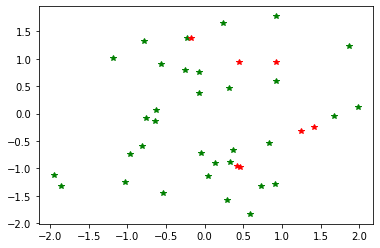

In [324]:
boolarray = np.array([x == y for x,y in zip(Y_test, pred_label)])
plt.plot(X_test[boolarray, 0], X_test[boolarray, 1], "*g")
plt.plot(X_test[boolarray == 0, 0], X_test[boolarray == 0, 1], "*r")

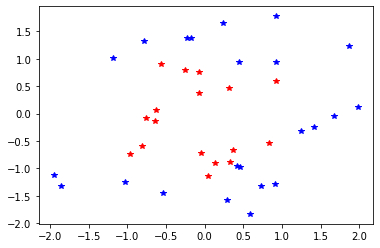

In [323]:
plt.plot(X_test[pred_label == 1, 0], X_test[pred_label == 1, 1], "*r")
plt.plot(X_test[pred_label == 0, 0], X_test[pred_label == 0, 1], "*b")

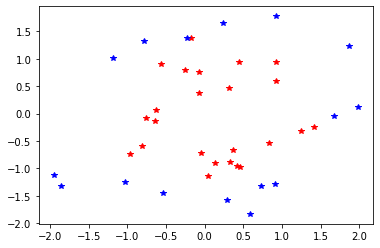

In [322]:
plt.plot(X_test[Y_test == 1, 0], X_test[Y_test == 1, 1], "*r")
plt.plot(X_test[Y_test == 0, 0], X_test[Y_test == 0, 1], "*b")